<a href="https://colab.research.google.com/github/Poorvaahuja/FaceVerification/blob/main/FaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!apt-get install -y libgl1-mesa-glx
!pip install face_recognition

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgl1-mesa-glx is already the newest version (23.0.4-0ubuntu1~22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [15]:
import cv2 as cv
import face_recognition
import matplotlib.pyplot as plt

In [16]:
known_image = face_recognition.load_image_file('/content/606439360494.png')

In [17]:
known_faces = face_recognition.face_encodings(face_image=known_image,
                                              num_jitters=50,
                                              model='large')[0]

In [18]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


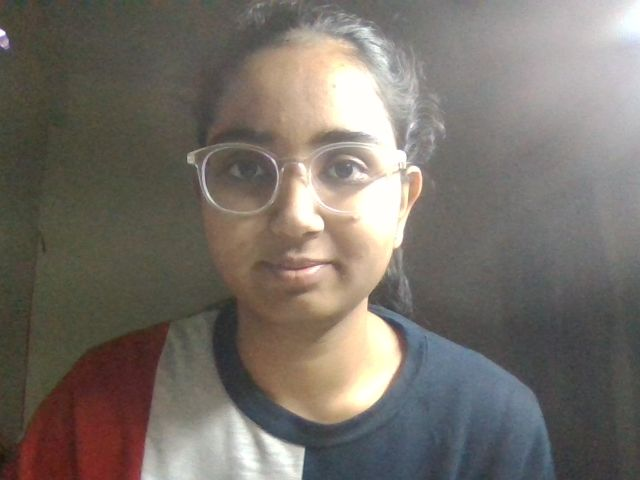

In [19]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Poorva Ahuja verified...


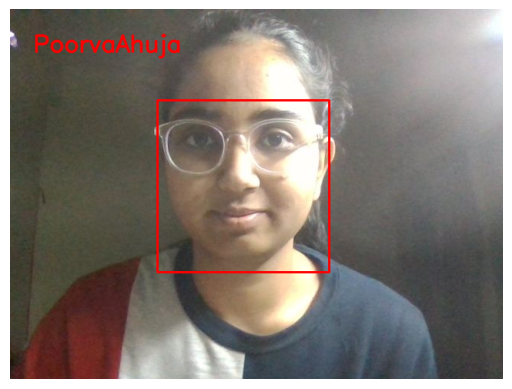

In [20]:
# Load the captured image
frame = cv.imread('/content/photo.jpg')

# Detect face locations
face_locations = face_recognition.face_locations(frame)

for face_location in face_locations:
    top, right, bottom, left = face_location
    frame = cv.rectangle(frame, (left, top), (right, bottom), color=(0, 0, 255), thickness=2)

try:
    # Get face encoding for the detected face
    Live_face_encoding = face_recognition.face_encodings(frame, known_face_locations=face_locations,
                                                         num_jitters=23,
                                                         model='large')[0]

    # Compare with known faces
    results = face_recognition.compare_faces([known_faces], Live_face_encoding)

    if results[0]:  # Match found
        img = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
        img = cv.putText(img, 'PoorvaAhuja', (30, 55), cv.FONT_HERSHEY_SIMPLEX, 1,
                         (255, 0, 0), 2, cv.LINE_AA)
        print('Poorva Ahuja verified...')
        plt.imshow(img)
        plt.axis('off')
        plt.show()

except Exception as e:
    # No match or an error occurred
    frame = cv.putText(frame, 'Not PoorvaAhuja', (30, 55), cv.FONT_HERSHEY_SIMPLEX, 1,
                       (255, 0, 0), 2, cv.LINE_AA)

    # Display the resulting frame
    frame_rgb = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.show()
